In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('../src/data')
from utils import *

In [3]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [4]:
df = pd.read_csv('~/work/digf-coref/data/interim/dataset.csv')

In [5]:
df

,filename,width,height,class,bboxes,total_bolts
0,../data/raw/2021-11-19_2_bolts_0020.jpg,4032,3024,Bolt,"[[2851, 1947, 3051, 2141], [751, 1847, 950, 20...",2
1,../data/raw/2021-10-29_1_bolts_0034.jpg,4032,3024,Bolt,"[[3555, 2415, 3760, 2614]]",1
2,../data/raw/2021-11-19_1_bolts_0057.jpg,1512,2016,Bolt,"[[568, 149, 667, 253]]",1
3,../data/raw/2021-11-19_2_bolts_0019.jpg,1512,2016,Bolt,"[[568, 130, 664, 223], [1276, 1224, 1373, 1324]]",2
4,../data/raw/2021-10-29_2_bolts_0006.jpg,4032,3024,Bolt,"[[486, 529, 686, 728], [1509, 544, 1704, 748]]",2
...,...,...,...,...,...,...
174,../data/raw/2021-11-19_8_bolts_0003.jpg,1512,2016,Bolt,"[[904, 1783, 1003, 1886], [188, 117, 292, 210]...",8
175,../data/raw/2021-11-19_4_bolts_0005.jpg,4032,3024,Bolt,"[[3066, 550, 3261, 744], [656, 1792, 855, 1992...",4
176,../data/raw/2021-10-29_3_bolts_0001.jpg,4032,3024,Bolt,"[[3480, 454, 3685, 653], [3490, 1791, 3690, 19...",3
177,../data/raw/2021-10-29_11_bolts_0002.jpg,4032,3024,Bolt,"[[371, 334, 576, 529], [381, 1018, 581, 1212],...",11


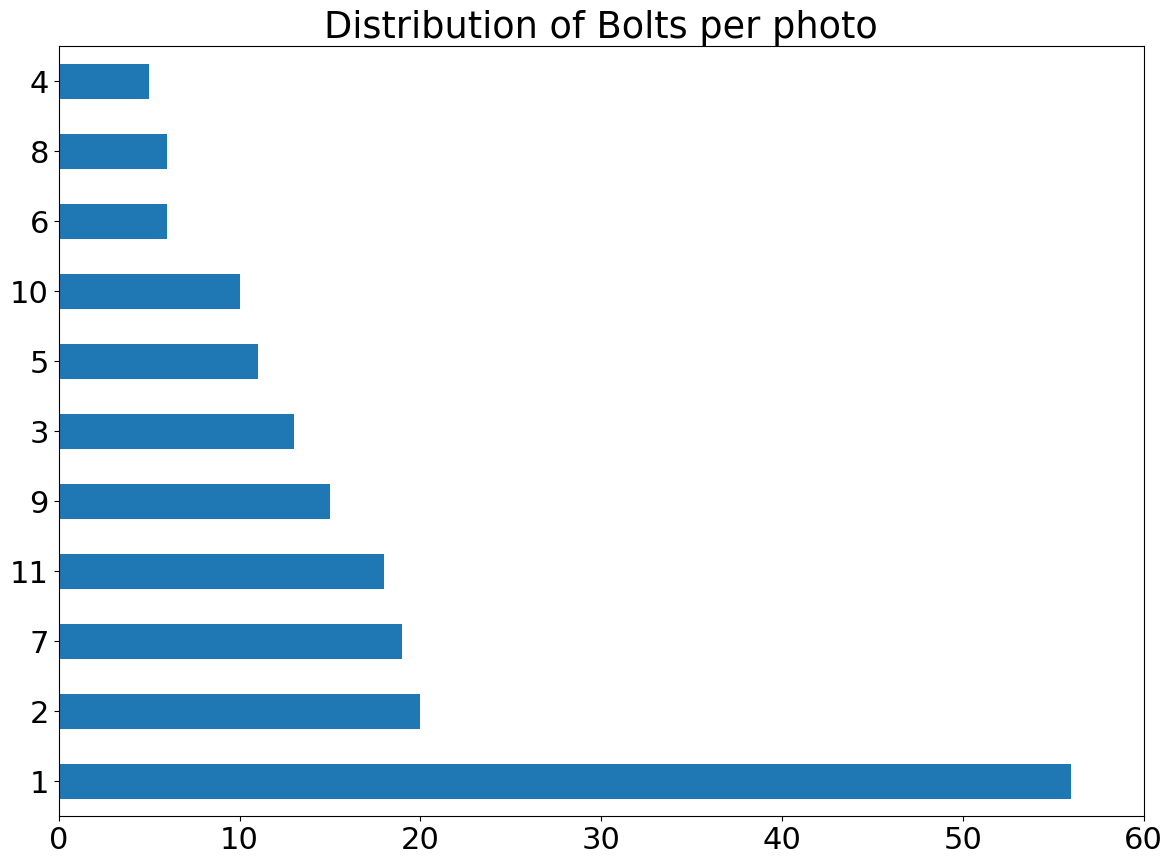

In [6]:
df.total_bolts.value_counts().plot(kind='barh')
plt.title('Distribution of Bolts per photo')
plt.xlim(0,60)
plt.show()

In [7]:
df['fold'] = -1

In [8]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,../data/raw/2021-11-19_2_bolts_0020.jpg,4032,3024,Bolt,"[[2851, 1947, 3051, 2141], [751, 1847, 950, 20...",2,-1
1,../data/raw/2021-10-29_1_bolts_0034.jpg,4032,3024,Bolt,"[[3555, 2415, 3760, 2614]]",1,-1
2,../data/raw/2021-11-19_1_bolts_0057.jpg,1512,2016,Bolt,"[[568, 149, 667, 253]]",1,-1
3,../data/raw/2021-11-19_2_bolts_0019.jpg,1512,2016,Bolt,"[[568, 130, 664, 223], [1276, 1224, 1373, 1324]]",2,-1
4,../data/raw/2021-10-29_2_bolts_0006.jpg,4032,3024,Bolt,"[[486, 529, 686, 728], [1509, 544, 1704, 748]]",2,-1
...,...,...,...,...,...,...,...
174,../data/raw/2021-11-19_8_bolts_0003.jpg,1512,2016,Bolt,"[[904, 1783, 1003, 1886], [188, 117, 292, 210]...",8,-1
175,../data/raw/2021-11-19_4_bolts_0005.jpg,4032,3024,Bolt,"[[3066, 550, 3261, 744], [656, 1792, 855, 1992...",4,-1
176,../data/raw/2021-10-29_3_bolts_0001.jpg,4032,3024,Bolt,"[[3480, 454, 3685, 653], [3490, 1791, 3690, 19...",3,-1
177,../data/raw/2021-10-29_11_bolts_0002.jpg,4032,3024,Bolt,"[[371, 334, 576, 529], [381, 1018, 581, 1212],...",11,-1


In [9]:
skf = StratifiedKFold(n_splits=5)

In [10]:
for fold_number, (train_index, val_index) in enumerate(skf.split(X=df['filename'], y=df['total_bolts'])):
    df.loc[df.iloc[val_index].index, 'fold'] = fold_number

In [11]:
df.fold.value_counts()

0    36
1    36
2    36
3    36
4    35
Name: fold, dtype: int64

In [12]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,../data/raw/2021-11-19_2_bolts_0020.jpg,4032,3024,Bolt,"[[2851, 1947, 3051, 2141], [751, 1847, 950, 20...",2,0
1,../data/raw/2021-10-29_1_bolts_0034.jpg,4032,3024,Bolt,"[[3555, 2415, 3760, 2614]]",1,0
2,../data/raw/2021-11-19_1_bolts_0057.jpg,1512,2016,Bolt,"[[568, 149, 667, 253]]",1,0
3,../data/raw/2021-11-19_2_bolts_0019.jpg,1512,2016,Bolt,"[[568, 130, 664, 223], [1276, 1224, 1373, 1324]]",2,0
4,../data/raw/2021-10-29_2_bolts_0006.jpg,4032,3024,Bolt,"[[486, 529, 686, 728], [1509, 544, 1704, 748]]",2,0
...,...,...,...,...,...,...,...
174,../data/raw/2021-11-19_8_bolts_0003.jpg,1512,2016,Bolt,"[[904, 1783, 1003, 1886], [188, 117, 292, 210]...",8,4
175,../data/raw/2021-11-19_4_bolts_0005.jpg,4032,3024,Bolt,"[[3066, 550, 3261, 744], [656, 1792, 855, 1992...",4,4
176,../data/raw/2021-10-29_3_bolts_0001.jpg,4032,3024,Bolt,"[[3480, 454, 3685, 653], [3490, 1791, 3690, 19...",3,4
177,../data/raw/2021-10-29_11_bolts_0002.jpg,4032,3024,Bolt,"[[371, 334, 576, 529], [381, 1018, 581, 1212],...",11,4


In [13]:
df.to_csv('~/work/digf-coref/data/interim/dataset_strat.csv', index=False)